In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://huggingface.co/datasets/nprak26/remote-worker-productivity/raw/main/remote_work_productivity.csv"
df = pd.read_csv(url)

In [3]:
relevant_columns = ['Age', 'Years_Experience', 'Work_Hours_Per_Week', 'Productivity_Score', 
                    'Meetings_Per_Week', 'Job_Satisfaction', 'Education_Level', 'Department', 
                    'Job_Level', 'Has_Children', 'Location_Type', 'Company_Size', 'WFH_Days_Per_Week']
df = df[relevant_columns]

total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [4]:
# numerical columns for scaling
num_cols = ['Age', 'Years_Experience', 'Work_Hours_Per_Week', 'Productivity_Score', 'Meetings_Per_Week', 'Job_Satisfaction']
df_num = df[num_cols]

In [5]:
# Apply MinMaxScaler to normalize to [0,1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_num)
df_scaled = pd.DataFrame(scaled_data, columns=num_cols)
df_scaled = pd.concat([df_scaled, df.drop(columns=num_cols).reset_index(drop=True)], axis=1)

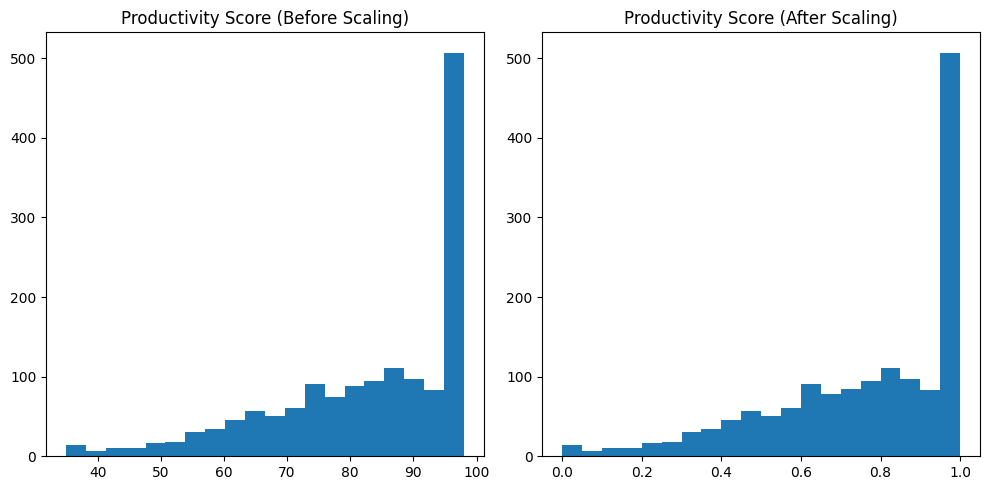

In [6]:
# Histogram of Productivity_Score before and after
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Productivity_Score'], bins=20)
plt.title("Productivity Score (Before Scaling)")
plt.subplot(1, 2, 2)
plt.hist(df_scaled['Productivity_Score'], bins=20)
plt.title("Productivity Score (After Scaling)")
plt.tight_layout()
plt.savefig("../results/eda_visualizations/productivity_before_after_scaling.png")
plt.show()

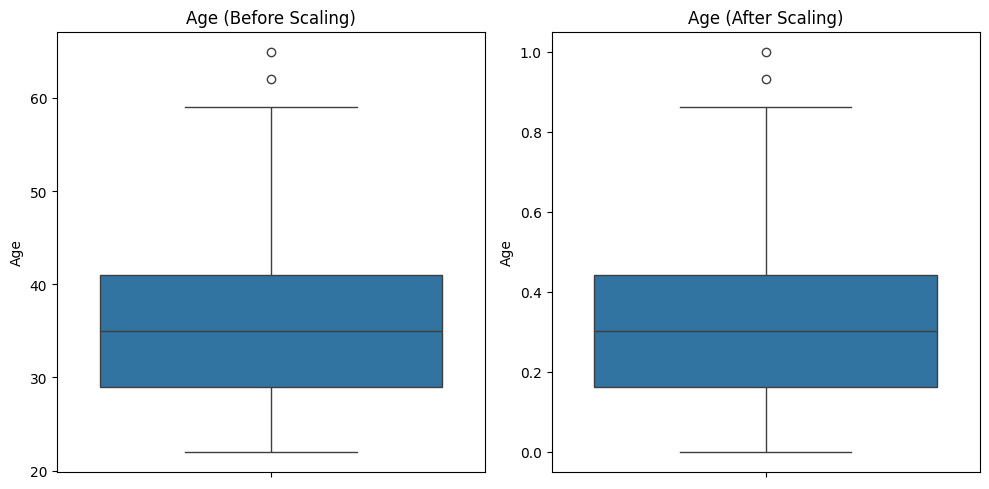

In [7]:
# Boxplot of Age before and after
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Age (Before Scaling)")
plt.subplot(1, 2, 2)
sns.boxplot(y=df_scaled['Age'])
plt.title("Age (After Scaling)")
plt.tight_layout()
plt.savefig("../results/eda_visualizations/age_before_after_scaling.png")
plt.show()